### Projeto de Análise de Dados com Linguagem Python

#### Projeto 2 - Técnica de Pré-Processamento Para Análise de Dados

**Pacotes Python usados no projeto**

In [61]:
!pip install -q -U watermark

In [62]:
!pip install -q -U missingno

In [63]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [64]:
%reload_ext watermark
%watermark -a "Leonardo da Silva Neves"

Author: Leonardo da Silva Neves



**Carregando os dados**

In [65]:
# Carregando o dateset
file = 'Cap04/dataset.csv'

In [66]:
# Criando o DataFrame
df = pd.read_csv(file)

In [67]:
# Verificando o tipo do objeto criado
type(df)

pandas.core.frame.DataFrame

In [68]:
# Conferindo as dimensões do dataframe
df.shape

(500, 5)

In [69]:
# Verificando o nome das colunas
df.columns

Index(['Idade', 'Salario', 'Genero', 'Escolaridade',
       'Score_Exame_Psicotecnico'],
      dtype='object')

In [70]:
# Visualizando as 5 primeiras linha
df.head()

,Idade,Salario,Genero,Escolaridade,Score_Exame_Psicotecnico
0,58,30404.959339,Masculino,Médio,56.0
1,48,20886.502401,Feminino,Médio,NaN
2,34,15959.388748,Masculino,Médio,57.0
3,62,28534.995327,Outro,Superior,68.0
4,27,10553.176215,Outro,Fundamental,44.0


In [71]:
# Amostra dos dados
df.sample(5)

,Idade,Salario,Genero,Escolaridade,Score_Exame_Psicotecnico
403,27,NaN,Outro,Fundamental,41.0
307,41,17949.918006,Feminino,Superior,NaN
12,55,23355.024945,Masculino,Médio,71.0
146,56,35511.785260,Masculino,Médio,56.0
358,21,-2984.433215,Masculino,Médio,43.0


In [72]:
# Resumo do tipo das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Idade                     500 non-null    int64  
 1   Salario                   450 non-null    float64
 2   Genero                    500 non-null    object 
 3   Escolaridade              500 non-null    object 
 4   Score_Exame_Psicotecnico  470 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 19.7+ KB


**Análise Exploratória de Dados**

Esta etapa do processo ajuda a compreender como os dados estão organizados e os eventuais problemas.

In [73]:
# Descrevendo os dados (variáveis categóricas)
df.describe(include=object)

,Genero,Escolaridade
count,500,500
unique,3,3
top,Feminino,Médio
freq,169,274


In [74]:
# Descrevendo os dados numéricos (variáveis discretas e contínuas)
df.describe()

,Idade,Salario,Score_Exame_Psicotecnico
count,500.000000,450.000000,470.000000
mean,42.848000,21252.781137,61.565957
std,13.189725,8322.933018,17.662523
min,20.000000,-3254.849042,20.000000
25%,31.750000,15139.019963,48.000000
50%,44.000000,21681.102602,61.000000
75%,54.000000,27379.540314,74.000000
max,65.000000,40845.107626,100.000000


**Visualizando a Distribuição das Variáveis Quantitativas**

In [75]:
df.head()

,Idade,Salario,Genero,Escolaridade,Score_Exame_Psicotecnico
0,58,30404.959339,Masculino,Médio,56.0
1,48,20886.502401,Feminino,Médio,NaN
2,34,15959.388748,Masculino,Médio,57.0
3,62,28534.995327,Outro,Superior,68.0
4,27,10553.176215,Outro,Fundamental,44.0


In [76]:
# Extraindo as colunas numéricas com List Comprehention
colunas_selecionadas = [list(df.columns.values) [i] for i in [0, 1, 4]]

In [77]:
colunas_selecionadas

['Idade', 'Salario', 'Score_Exame_Psicotecnico']

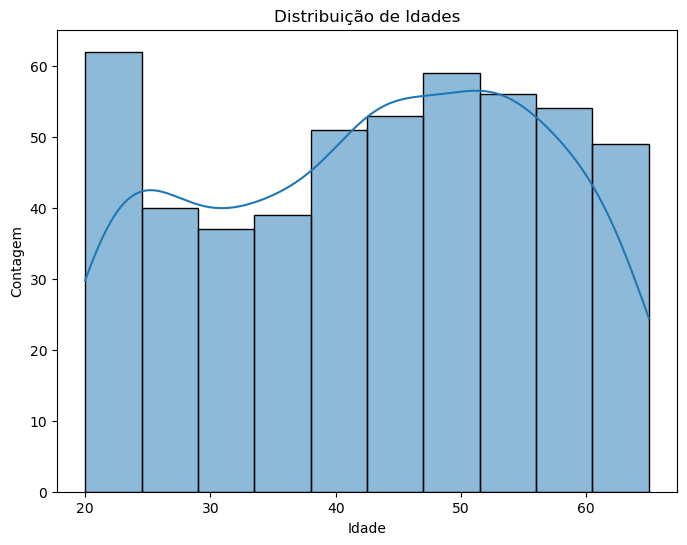

In [78]:
# Distribuição de idade
plt.figure(figsize=(8, 6))
sns.histplot(df['Idade'], kde=True)
plt.title('Distribuição de Idades')
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.show()

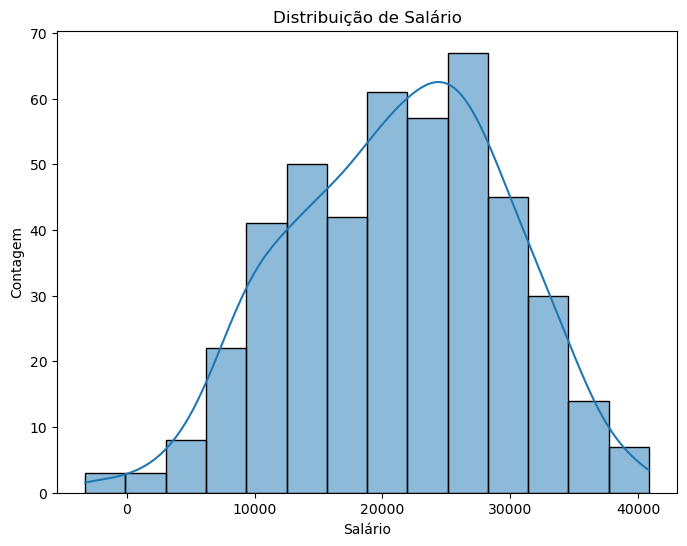

In [79]:
# Distribuição de Salários
plt.figure(figsize=(8, 6))
sns.histplot(df['Salario'], kde=True)
plt.title('Distribuição de Salário')
plt.xlabel('Salário')
plt.ylabel('Contagem')
plt.show()

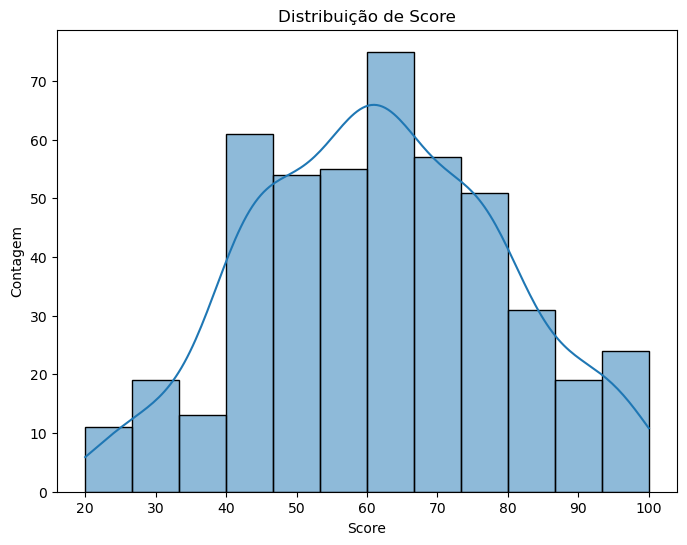

In [80]:
# Distribuição de Score
plt.figure(figsize=(8,6))
sns.histplot(df['Score_Exame_Psicotecnico'], kde=True)
plt.title('Distribuição de Score')
plt.xlabel('Score')
plt.ylabel('Contagem')
plt.show()

**Visualizando a Distribuição das Variáveis Qualitativas**

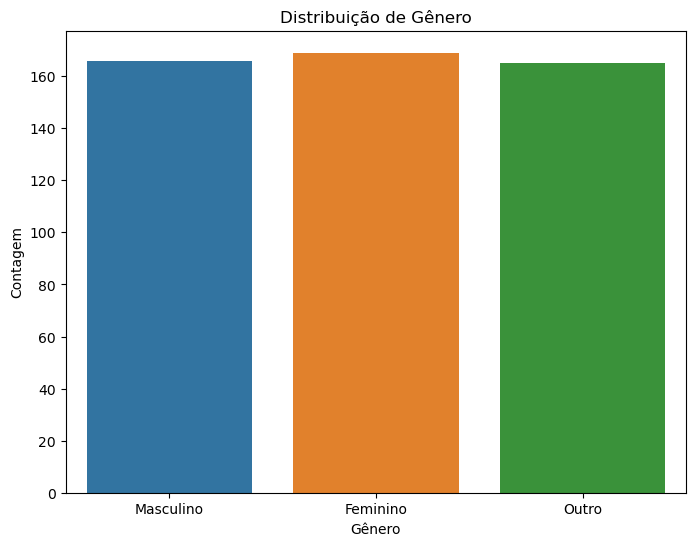

In [81]:
# Distribuição de Gênero
plt.figure(figsize=(8,6))
sns.countplot(data = df, x='Genero', hue = 'Genero')
plt.title('Distribuição de Gênero')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.show()

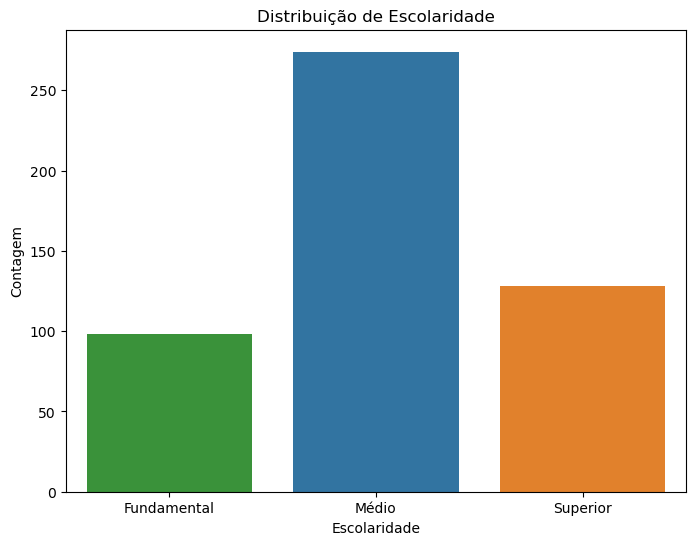

In [82]:
# Distribuição de Escolaridade
plt.figure(figsize=(8,6))
sns.countplot(data = df, x = 'Escolaridade', order = ['Fundamental', 'Médio', 'Superior'], hue = 'Escolaridade')
plt.title('Distribuição de Escolaridade')
plt.xlabel('Escolaridade')
plt.ylabel('Contagem')
plt.show()

**Correlação Entre Variáveis Quantitativas**

A correlação entre as variáveis quantitativas nos permite entender como uma variável se move em relação à outra. O método mais comum para calcular a correlação entre variáveis quantitativas (entre contínuas é o mais indicado para usar Pearson) é usando o coeficiente de correlação de Pearson, que varia entre -1 e 1.

- quanto mais próximo de 1, mais forte a correlação positiva.
- quanto mais próximo de -1, mais forte é a correlação negativa.
- próximo de zero indica pouca ou nenhuma correlação.

In [83]:
# Calaculando a matriz de correlação apenas para as variáveis quantitativas
correlation_matrix = df[['Idade', 'Salario', 'Score_Exame_Psicotecnico']].corr()

In [84]:
print(correlation_matrix)

                             Idade   Salario  Score_Exame_Psicotecnico
Idade                     1.000000  0.810266                 -0.030818
Salario                   0.810266  1.000000                 -0.004153
Score_Exame_Psicotecnico -0.030818 -0.004153                  1.000000


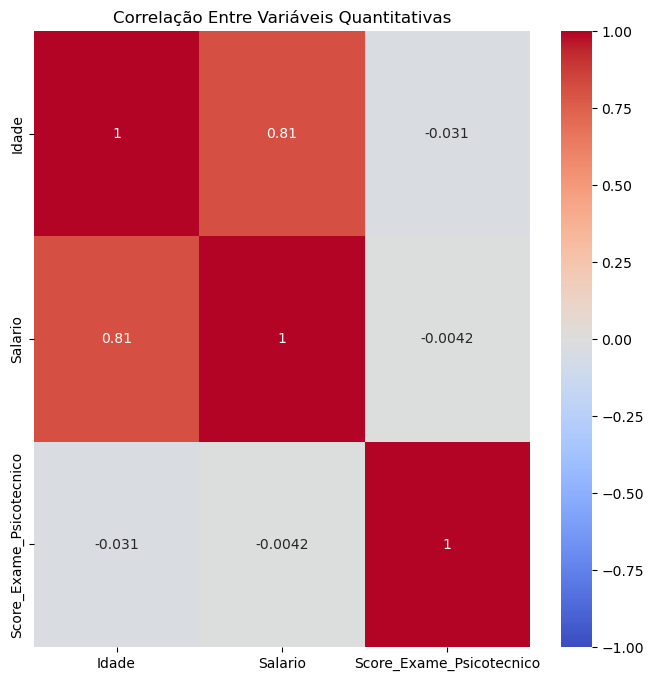

In [85]:
# Visualização a matriz de correlação com um heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap= 'coolwarm', vmin= -1, vmax= 1, cbar = True)
plt.title('Correlação Entre Variáveis Quantitativas')
plt.show()

**Associação Entre Variáveis Qualitativas**

Para variáveis categóricas usamos associação (e não correlação Pearson .corr()) para analisar a relação entre as variáveis. Vejamos algumas técnicas de associação.

**Tabela de Contingência**: É basicamente um tabela cruzada (crosstab) que mostra a frequência (ou contagem) de observações em cada categoria para suas variáveis.

In [86]:
# Tabela de contingência
tabela_contingencia = pd.crosstab(df['Genero'], df['Escolaridade'])

In [87]:
print(tabela_contingencia)

Escolaridade  Fundamental  Médio  Superior
Genero                                    
Feminino               31     90        48
Masculino              32     95        39
Outro                  35     89        41


**Teste do Qui-quadrado (X²):** É usado para testar a idependência entre duas variáveis categóricas.

O teste do Qui-quadrado (chi-quadrado) é uma técnica estatística que é usada para determinar se há uma associação significativa entre duas variáveis
categóricas em um conjunto de dados. Existem várias hipóteses associadas ao teste do qui-quadrado:

Hipóteses Nula (H0): A hipótese nula afirma não há associação significativa entre as duas variáveis categóricas no conjunto de dados. Em outras palavras, as duas variáveis são independentes uma da outra.

Hipótese Alternativa (H1 ou Ha): A hipótese alternativa é a negação da hipótese nula. Ela sugere que há uma associação significativa entre as duas variáveis categóricas no conjunto de dados. Em termos simples, as duas variáveis não são independentes.

Aplicamos o teste e analisamos o valor-p. Se o valor-p for menor que um nível de significância (geralmente 0,05), podemos rejeitar a hipótese nula de que as variáveis são independentes.

In [88]:
# Carrega a função chi2_contingency
from scipy.stats import chi2_contingency

In [89]:
# Aplicando a função chi2_contingency
chi2, p, _, _ = chi2_contingency(tabela_contingencia)

In [90]:
print(f"Valor-p do teste Qui-quadrado: {p:.4f}")

Valor-p do teste Qui-quadrado: 0.8300


Neste caso falhamos em rejeitar H0. Provavelmente as duas variáveis são idependentes uma da outra.

**Coeficiente de Contigência de Cramér (V):**

Mede a forca da associação entre suas variáveis nominais. Seu valor varia de 0 (sem associação) a 1 (associação perfeita).
É baseado no valor do qui-quadrado.

In [91]:
# Calculando o Coeficiente de Contingência de Cramer
n = tabela_contingencia.sum().sum()
phi2 = chi2 / n
r, k = tabela_contingencia.shape
cramers_v = np.sqrt(phi2 / min(r-1, k-1))
print(f"Coeficiente de Cramer V: {cramers_v:.4f}")

Coeficiente de Cramer V: 0.0385


Provavelmente não há associação entre as variáveis

**Técnicas de Pré-Processamento de Dados**

Até aqui analisamos e exploramos os dados. Usamos o resultado desse trabalho para decidir o tipo de processamento que devemos realizar. Começaremos pelo tratamento de valores ausentes, duplicates e valores negativos.

**Valores Duplicados**

In [92]:
# Usamos o método duplicated() para criar um série de valores booleanos indicando duplicatas
duplicatas = df.duplicated()

In [93]:
# Exibe as linhas que estão duplicadas
df[duplicatas]

,Idade,Salario,Genero,Escolaridade,Score_Exame_Psicotecnico


**Valores Negativos**

In [94]:
# Verificando valores negativos na coluna Salario
df[df['Salario'] < 0]

,Idade,Salario,Genero,Escolaridade,Score_Exame_Psicotecnico
94,20,-619.478622,Masculino,Médio,58.0
358,21,-2984.433215,Masculino,Médio,43.0
380,20,-3254.849042,Outro,Médio,50.0


Valores negativos na variável Salario serão convertidos em valores ausentes e então faremos o tratamento dos valores ausentes.

In [95]:
# Substituindo valores negativos por NaN (Valores Ausentes)
df['Salario'] = df['Salario'].apply(lambda x: x if x >= 0 else None)

In [96]:
df[df['Salario'] < 0]

,Idade,Salario,Genero,Escolaridade,Score_Exame_Psicotecnico


**Valores Ausentes**

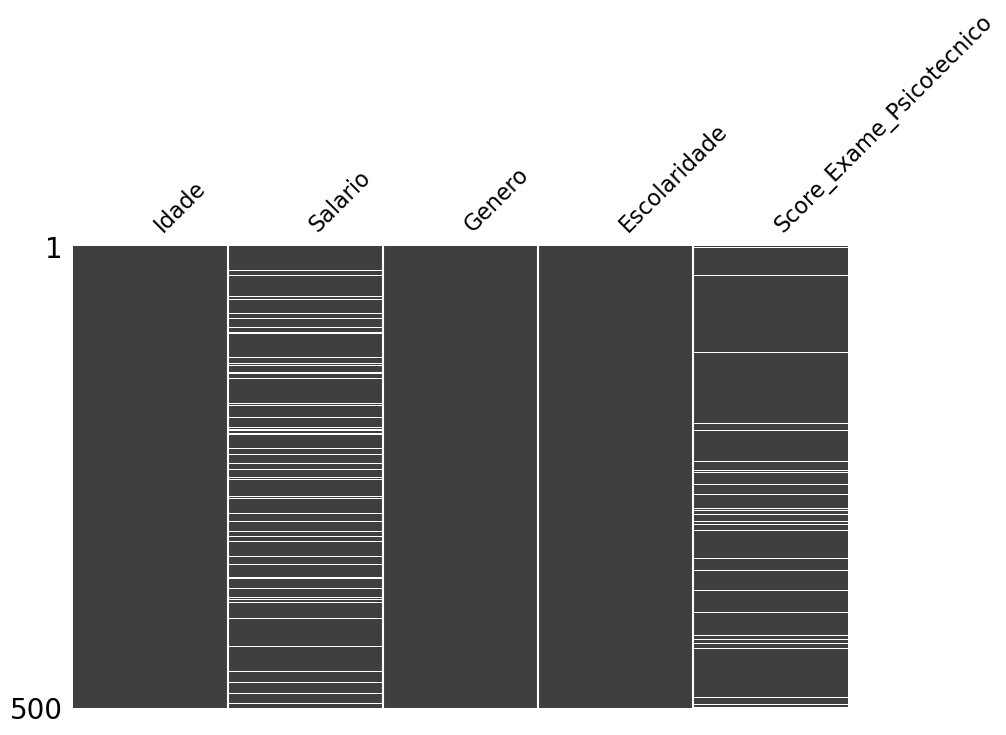

In [97]:
# Mapa de valores ausentes
msno.matrix(df, figsize=(10,6), sparkline = False)
plt.show()

Neste gráfico, a presença de dados é representado por barras escuras e os valores ausentes são representados por espaços em branco. O lado direito do gráfico fornece um gráfico de barras que indica a quantidade total de valores presentes para cada variável.

In [98]:
# Usando o método isna() para verificar os valores ausentes em cada coluna
valores_ausentes = df.isna().sum()

In [99]:
print(valores_ausentes)

Idade                        0
Salario                     53
Genero                       0
Escolaridade                 0
Score_Exame_Psicotecnico    30
dtype: int64


In [100]:
# Calculando a porcentagem de valores ausentes em cada coluna
porcentagem_ausentes = (df.isna().mean() * 100).round(2)

In [101]:
# 50% de dados ausentes, se não há o que fazer para retoma-las, recomenda-se excluir a coluna.
print(porcentagem_ausentes)

Idade                        0.0
Salario                     10.6
Genero                       0.0
Escolaridade                 0.0
Score_Exame_Psicotecnico     6.0
dtype: float64


**Estratégia de Tratamento de Valores Ausentes**

Quando temos uma variável com valores ausentes, como nesse caso em que a variável "salário" tem 10% de valores ausentes, existem várias estratégias que podemos considerar para lidar com esses valores ausentes. A escolha da estratégia  depende do contexto dos seus dados e do objetivo da análise. Algumas das estratégias comuns incluem:

**Remoção de linhas**: Você podem optar por escluir as linhas que contêm valores ausentes na coluna salário. Isso é apropriado se a quantidade de dados faltante for pequena em relação ao tamanho total do conjunto de dados e se a remoção não introduz viés nos seus resultados. No entando, essa estratégia pode levar à perda de informações.

**Preenchimento com um valor padrão**: Dependendo do contexto, você pode optar por preencher os valores ausentes com um valor padrão, como a média, a mediana ou um valor específico. Isso pode ser apropriado se você acredita que os valores ausentes não são critérios e que um valor padrão não afetará.

**Preenchimento com base em outras variáveis**:Às vezes, podemos usar informações de outras variáveis do dataset para preencher os valores ausentes de "saldo". Por exemplo, podemos preencher com a média dos salários  de pessoas com a mesma escolaridade ou o mesmo gênero.

**Modelo de Previsão**: Se a variável "salário" for importante e os valores ausentes não puderem ser facilmente preenchidos com mádia ou valores padrão, você pode criar um modelo preditivo para estimar os valores ausentes com base em outras variáveis relevantes. Isso é mais complexo, mas podem ser uma abordagem poderosa se você suficiêntes e a variável "salário" for fundamental para a análise.

**Teste de Normalidade Para Decidir a Estratégia de Tratamento de Valores Ausentes**

Para preenchermos os valores ausentes com a média devemos verificar se a variável segue uma distribuição **normal**. Se a variável seguir uma distribuição normal, podemos usar a média ou a mediana. Caso contrário devemos usar a mediana.

In [104]:
from scipy import stats

# Extraia a coluna "salario" em uma série
salario = df['Salario']


# Aplique o teste de Shapiro-Wilk
stat, p_valor = stats.shapiro(salario)

# Imprima o resultado do teste
print(f"Estatística de teste: {stat}")
print(f"Valor-p: {p_valor}")

# Verifique a hipótese nula com base no p-valor
alfa = 0.05 # Nível de significância
if p_valor > alfa:
    print("Não há evidências para rejeitar a hipótese nula (os dados parecem seguir uma distribuição normal).")
else:
    print("A hipótese nula é rejeitada (os dados não seguem um distribuição normal.)")

Estatística de teste: nan
Valor-p: nan
A hipótese nula é rejeitada (os dados não seguem um distribuição normal.)


**Imputação para Tratamento de Valores Ausentes**

In [106]:
# Calcular a média da variável "Salário" (ignorando os valores ausentes)
media_salario = df['Salario'].mean()

In [107]:
# Preechendo os valores ausentes em "salario" com a média
df['Salario'].fillna(media_salario, inplace = True)

In [109]:
# Verificando valores ausentes em cada coluna
valores_ausentes = df.isna().sum()
print(valores_ausentes)

Idade                        0
Salario                      0
Genero                       0
Escolaridade                 0
Score_Exame_Psicotecnico    30
dtype: int64


In [110]:
# Extraia a coluna "salario" em uma série
score_exame = df['Score_Exame_Psicotecnico']


# Aplique o teste de Shapiro-Wilk
stat, p_valor = stats.shapiro(score_exame)

# Imprima o resultado do teste
print(f"Estatística de teste: {stat}")
print(f"Valor-p: {p_valor}")

# Verifique a hipótese nula com base no p-valor
alfa = 0.05 # Nível de significância
if p_valor > alfa:
    print("Não há evidências para rejeitar a hipótese nula (os dados parecem seguir uma distribuição normal).")
else:
    print("A hipótese nula é rejeitada (os dados não seguem um distribuição normal.)")

Estatística de teste: nan
Valor-p: nan
A hipótese nula é rejeitada (os dados não seguem um distribuição normal.)


In [111]:
# Calcular a média da variável "Salário" (ignorando os valores ausentes)
media_score = df['Score_Exame_Psicotecnico'].mean()

In [112]:
# Preechendo os valores ausentes em "salario" com a média
df['Score_Exame_Psicotecnico'].fillna(media_score, inplace = True)

In [113]:
# Verificando valores ausentes em cada coluna
valores_ausentes = df.isna().sum()
print(valores_ausentes)

Idade                       0
Salario                     0
Genero                      0
Escolaridade                0
Score_Exame_Psicotecnico    0
dtype: int64
